In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# Any results you write to the current directory are saved as output.

/kaggle/input/ga-customer-revenue-prediction/sample_submission.csv
/kaggle/input/ga-customer-revenue-prediction/test_v2.csv
/kaggle/input/ga-customer-revenue-prediction/sample_submission_v2.csv
/kaggle/input/ga-customer-revenue-prediction/train_v2.csv
/kaggle/input/ga-customer-revenue-prediction/test.csv
/kaggle/input/ga-customer-revenue-prediction/train.csv


Read in train_v2.csv and test_v2.csv

In [2]:
import os
import json
import numpy as np
import pandas as pd
from pandas.io.json import json_normalize
import matplotlib.pyplot as plt

In [3]:
def load_df(csv_path='/kaggle/input/ga-customer-revenue-prediction/train.csv', nrows=None):
    JSON_COLUMNS = ['device', 'geoNetwork', 'totals', 'trafficSource']
    
    df = pd.read_csv(csv_path, 
                     converters={column: json.loads for column in JSON_COLUMNS}, 
                     dtype={'fullVisitorId': 'str'}, # Important!!
                     nrows=nrows)
    
    for column in JSON_COLUMNS:
        column_as_df = json_normalize(df[column])
        column_as_df.columns = [f"{column}.{subcolumn}" for subcolumn in column_as_df.columns]
        df = df.drop(column, axis=1).merge(column_as_df, right_index=True, left_index=True)
    print(f"Loaded {os.path.basename(csv_path)}. Shape: {df.shape}")
    return df

In [4]:
%%time
train_df = load_df()
test_df = load_df("/kaggle/input/ga-customer-revenue-prediction/test.csv")

Loaded train.csv. Shape: (903653, 55)
Loaded test.csv. Shape: (804684, 53)
CPU times: user 7min 52s, sys: 19.4 s, total: 8min 11s
Wall time: 8min 12s


In [5]:
train_df.head()

,channelGrouping,date,fullVisitorId,sessionId,socialEngagementType,visitId,visitNumber,visitStartTime,device.browser,device.browserVersion,...,trafficSource.adwordsClickInfo.criteriaParameters,trafficSource.isTrueDirect,trafficSource.referralPath,trafficSource.adwordsClickInfo.page,trafficSource.adwordsClickInfo.slot,trafficSource.adwordsClickInfo.gclId,trafficSource.adwordsClickInfo.adNetworkType,trafficSource.adwordsClickInfo.isVideoAd,trafficSource.adContent,trafficSource.campaignCode
0,Organic Search,20160902,1131660440785968503,1131660440785968503_1472830385,Not Socially Engaged,1472830385,1,1472830385,Chrome,not available in demo dataset,...,not available in demo dataset,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Organic Search,20160902,377306020877927890,377306020877927890_1472880147,Not Socially Engaged,1472880147,1,1472880147,Firefox,not available in demo dataset,...,not available in demo dataset,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Organic Search,20160902,3895546263509774583,3895546263509774583_1472865386,Not Socially Engaged,1472865386,1,1472865386,Chrome,not available in demo dataset,...,not available in demo dataset,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Organic Search,20160902,4763447161404445595,4763447161404445595_1472881213,Not Socially Engaged,1472881213,1,1472881213,UC Browser,not available in demo dataset,...,not available in demo dataset,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Organic Search,20160902,27294437909732085,27294437909732085_1472822600,Not Socially Engaged,1472822600,2,1472822600,Chrome,not available in demo dataset,...,not available in demo dataset,True,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [6]:
train_df.columns.values

array(['channelGrouping', 'date', 'fullVisitorId', 'sessionId',
       'socialEngagementType', 'visitId', 'visitNumber', 'visitStartTime',
       'device.browser', 'device.browserVersion', 'device.browserSize',
       'device.operatingSystem', 'device.operatingSystemVersion',
       'device.isMobile', 'device.mobileDeviceBranding',
       'device.mobileDeviceModel', 'device.mobileInputSelector',
       'device.mobileDeviceInfo', 'device.mobileDeviceMarketingName',
       'device.flashVersion', 'device.language', 'device.screenColors',
       'device.screenResolution', 'device.deviceCategory',
       'geoNetwork.continent', 'geoNetwork.subContinent',
       'geoNetwork.country', 'geoNetwork.region', 'geoNetwork.metro',
       'geoNetwork.city', 'geoNetwork.cityId', 'geoNetwork.networkDomain',
       'geoNetwork.latitude', 'geoNetwork.longitude',
       'geoNetwork.networkLocation', 'totals.visits', 'totals.hits',
       'totals.pageviews', 'totals.bounces', 'totals.newVisits',
       't

Checking unqiues values in columns. There are many columns having `not available in demo dataset`.

In [7]:
cols = train_df.columns.values
for col in cols:
    print(col, 'has {} unqiue values'.format(str(len(train_df[col].unique()))),'\n')
    

channelGrouping has 8 unqiue values 

date has 366 unqiue values 

fullVisitorId has 714167 unqiue values 

sessionId has 902755 unqiue values 

socialEngagementType has 1 unqiue values 

visitId has 886303 unqiue values 

visitNumber has 384 unqiue values 

visitStartTime has 887159 unqiue values 

device.browser has 54 unqiue values 

device.browserVersion has 1 unqiue values 

device.browserSize has 1 unqiue values 

device.operatingSystem has 20 unqiue values 

device.operatingSystemVersion has 1 unqiue values 

device.isMobile has 2 unqiue values 

device.mobileDeviceBranding has 1 unqiue values 

device.mobileDeviceModel has 1 unqiue values 

device.mobileInputSelector has 1 unqiue values 

device.mobileDeviceInfo has 1 unqiue values 

device.mobileDeviceMarketingName has 1 unqiue values 

device.flashVersion has 1 unqiue values 

device.language has 1 unqiue values 

device.screenColors has 1 unqiue values 

device.screenResolution has 1 unqiue values 

device.deviceCategory has

delete columns that only have a single value because they don't have the predictive power under this situation

In [8]:
delete_cols = []
for col in cols:
    if (len(train_df[col].unique())) == 1:
        delete_cols.append(col)

#train_df_drop = train_df.drop(delete_cols, axis=1)
print('original train_df has {} columns'.format(len(cols)),'\n')
print('after deleting {} columns'.format(len(delete_cols)),'\n')
print('new train_df has {} columns'.format(len(cols)-len(delete_cols)))



original train_df has 55 columns 

after deleting 19 columns 

new train_df has 36 columns


## Target Variable Explanantion

The final goal is to predict the log of sum revenue of each customer (`total.transactionRevenue`). Firstly, check the transaction revenue at user level and then take a log for the visualization.

In [9]:
train_df.dtypes

channelGrouping                                      object
date                                                  int64
fullVisitorId                                        object
sessionId                                            object
socialEngagementType                                 object
visitId                                               int64
visitNumber                                           int64
visitStartTime                                        int64
device.browser                                       object
device.browserVersion                                object
device.browserSize                                   object
device.operatingSystem                               object
device.operatingSystemVersion                        object
device.isMobile                                        bool
device.mobileDeviceBranding                          object
device.mobileDeviceModel                             object
device.mobileInputSelector              

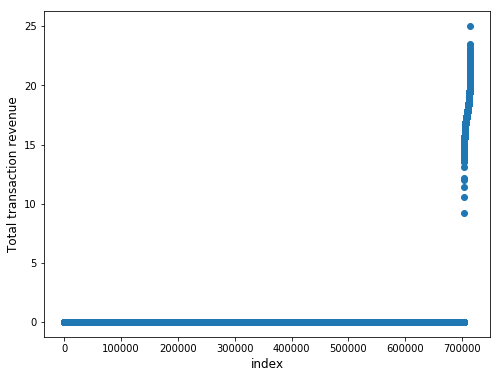

In [10]:
train_df['totals.transactionRevenue'] = train_df['totals.transactionRevenue'].astype('float')
#group by using the unique identiifer `fullVisitorId`
transaction_sum_user = train_df.groupby('fullVisitorId')['totals.transactionRevenue'].sum().reset_index()

#plot revenue of all transactions
plt.figure(figsize=(8,6))
# using np.log1p to avoid errors
plt.scatter(x=transaction_sum_user.index.values, y=np.sort(np.log1p(transaction_sum_user['totals.transactionRevenue'].values)))
plt.xlabel('index', fontsize=12)
plt.ylabel('Total transaction revenue', fontsize=12)
plt.show()

From the graph, it seems like over a small amount of users have non-zero transaction revenue. It corresponds to the 80-20 principle. Let's check what is the percentage of non-zero values!

In [11]:
print("percentage of non-zero values:", len(transaction_sum_user[transaction_sum_user['totals.transactionRevenue']!=0])/transaction_sum_user.shape[0])

percentage of non-zero values: 0.013996726255903731


The ratio of revenue generating customers is 1.3%. Very small percentage of rows have not-zero revenue and we need to dive deep and figure out the distribution of those non-zero revenue customer according to different category.

In [12]:
train_df_drop = train_df.drop(delete_cols, axis=1)

In [13]:
train_df_drop.columns

Index(['channelGrouping', 'date', 'fullVisitorId', 'sessionId', 'visitId',
       'visitNumber', 'visitStartTime', 'device.browser',
       'device.operatingSystem', 'device.isMobile', 'device.deviceCategory',
       'geoNetwork.continent', 'geoNetwork.subContinent', 'geoNetwork.country',
       'geoNetwork.region', 'geoNetwork.metro', 'geoNetwork.city',
       'geoNetwork.networkDomain', 'totals.hits', 'totals.pageviews',
       'totals.bounces', 'totals.newVisits', 'totals.transactionRevenue',
       'trafficSource.campaign', 'trafficSource.source',
       'trafficSource.medium', 'trafficSource.keyword',
       'trafficSource.isTrueDirect', 'trafficSource.referralPath',
       'trafficSource.adwordsClickInfo.page',
       'trafficSource.adwordsClickInfo.slot',
       'trafficSource.adwordsClickInfo.gclId',
       'trafficSource.adwordsClickInfo.adNetworkType',
       'trafficSource.adwordsClickInfo.isVideoAd', 'trafficSource.adContent',
       'trafficSource.campaignCode'],
      dty

## **Device Information**

In [14]:
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import plotly.offline as py

def horizontal_bar_chart(cnt_srs, color):
    trace = go.Bar(
        y=cnt_srs.index[::-1],
        x=cnt_srs.values[::-1],
        showlegend=False,
        orientation = 'h',
        marker=dict(
            color=color,
        ),
    )
    return trace

# groupby `device.brower`
group1 = train_df_drop.groupby(['device.browser'])['totals.transactionRevenue'].agg(['size','count','mean'])
group1.columns = ['count', 'count of non-zero revenue', 'mean']
group1 = group1.sort_values(by='count', ascending=False)
trace1 = horizontal_bar_chart(group1['count'].head(10),'rgba(50, 171, 96, 0.6)')
trace2 = horizontal_bar_chart(group1['count of non-zero revenue'].head(10),'rgba(50, 171, 96, 0.6)')
trace3 = horizontal_bar_chart(group1['mean'].head(10),'rgba(50, 171, 96, 0.6)')

# groupby `device.category`
group2 = train_df.groupby('device.deviceCategory')['totals.transactionRevenue'].agg(['size', 'count', 'mean'])
group2.columns = ["count", "count of non-zero revenue", "mean"]
group2 = group2.sort_values(by="count", ascending=False)
trace4 = horizontal_bar_chart(group2["count"].head(10), 'rgba(71, 58, 131, 0.8)')
trace5 = horizontal_bar_chart(group2["count of non-zero revenue"].head(10), 'rgba(71, 58, 131, 0.8)')
trace6 = horizontal_bar_chart(group2["mean"].head(10), 'rgba(71, 58, 131, 0.8)')

# groupby `operating system`
group3 = train_df.groupby('device.operatingSystem')['totals.transactionRevenue'].agg(['size', 'count', 'mean'])
group3.columns = ["count", "count of non-zero revenue", "mean"]
group3 = group3.sort_values(by="count", ascending=False)
trace7 = horizontal_bar_chart(group3["count"].head(10), 'rgba(246, 78, 139, 0.6)')
trace8 = horizontal_bar_chart(group3["count of non-zero revenue"].head(10),'rgba(246, 78, 139, 0.6)')
trace9 = horizontal_bar_chart(group3["mean"].head(10),'rgba(246, 78, 139, 0.6)')

# creating subplots
fig = make_subplots(rows=3, cols=3, vertical_spacing=0.04, 
                          subplot_titles=["Device Browser - Count", "Device Browser - Non-zero Revenue Count", "Device Browser - Mean Revenue",
                                          "Device Category - Count",  "Device Category - Non-zero Revenue Count", "Device Category - Mean Revenue", 
                                          "Device OS - Count", "Device OS - Non-zero Revenue Count", "Device OS - Mean Revenue"])

fig.append_trace(trace1, 1, 1)
fig.append_trace(trace2, 1, 2)
fig.append_trace(trace3, 1, 3)
fig.append_trace(trace4, 2, 1)
fig.append_trace(trace5, 2, 2)
fig.append_trace(trace6, 2, 3)
fig.append_trace(trace7, 3, 1)
fig.append_trace(trace8, 3, 2)
fig.append_trace(trace9, 3, 3)

fig['layout'].update(height=1200, width=1200, paper_bgcolor='rgb(233,233,233)', title="Device Plots")
py.iplot(fig, filename='device-plots')

Conclusion for `device_plot` graph:

* `Device browser` 
    * `Device browser` seems to have similar distribution both on count, count of non-zero revenue plots.
    * For the average revenue, firefox has much more higher revenue compared to other browers.
    
    
* `Device Cateogory`
    * For count, count of non-zero revenue and average revenue, desktop has higher percentages in these three aspects compared to mobile and tablet. The average revenue per customer is same for mobile and tablet.
    
    
* `Desktop Device OS`
    * Macintosh has the highest non-zero revenue count.
    * Chrome OS has the highest average revenue and also the highest percentage of non-zero revenue counts
    

* `Mobile Device OS`
    * iOS has more percentage of non-zero revenue counts compared to Android.

## Date infomation 

In [15]:
from datetime import date

train_df['date'].head()

0    20160902
1    20160902
2    20160902
3    20160902
4    20160902
Name: date, dtype: int64

train_df['date'] is a string and we need to change to datetime.

In [16]:
def scatter_plot(cnt_srs, color):
    trace = go.Scatter(
        x=cnt_srs.index[::-1],
        y=cnt_srs.values[::-1],
        showlegend=False,
        marker=dict(
            color=color,
        ),
    )
    return trace

train_df['date'] = train_df['date'].apply(lambda x: date(int(str(x)[:4]), int(str(x)[4:6]), int(str(x)[6:])))
group = train_df.groupby('date')['totals.transactionRevenue'].agg(['size', 'count'])
group.columns = ["count", "count of non-zero revenue"]
group = group.sort_index()
trace1 = scatter_plot(group["count"], 'red')
trace2 = scatter_plot(group["count of non-zero revenue"], 'blue')

fig = make_subplots(rows=2, cols=1, vertical_spacing=0.08,
                          subplot_titles=["Date - Count", "Date - Non-zero Revenue count"])
fig.append_trace(trace1, 1, 1)
fig.append_trace(trace2, 2, 1)
fig['layout'].update(height=800, width=800, paper_bgcolor='rgb(233,233,233)', title="Date Plots")
py.iplot(fig, filename='date-plots')

Conclustion for `date-plot` graph:
* The time period is from Aug1 2016 to Jul31 2017 in the training dataset.
* There is an increase in the count of visitors in Nov 2016 but it doesn't bring more revenue for that time.
* The average revenue plot seems to be a random walk.

## Geographic(geoNetwork) information

In [17]:


# groupby `geoNetwork.continent`, continent information
group = train_df.groupby('geoNetwork.continent')['totals.transactionRevenue'].agg(['size', 'count', 'mean'])
group.columns = ["count", "count of non-zero revenue", "mean"]
group = group.sort_values(by="count", ascending=False)
trace1 = horizontal_bar_chart(group["count"].head(10), 'rgba(58, 71, 80, 0.6)')
trace2 = horizontal_bar_chart(group["count of non-zero revenue"].head(10), 'rgba(58, 71, 80, 0.6)')
trace3 = horizontal_bar_chart(group["mean"].head(10), 'rgba(58, 71, 80, 0.6)')

# groupby `geoNetwork.subContinent`, subcontinent information
group = train_df.groupby('geoNetwork.subContinent')['totals.transactionRevenue'].agg(['size', 'count', 'mean'])
group.columns = ["count", "count of non-zero revenue", "mean"]
group = group.sort_values(by="count", ascending=False)
trace4 = horizontal_bar_chart(group["count"], 'orange')
trace5 = horizontal_bar_chart(group["count of non-zero revenue"], 'orange')
trace6 = horizontal_bar_chart(group["mean"], 'orange')

# groupby `geoNetwork.networkDomain`, domain information
group = train_df.groupby('geoNetwork.networkDomain')['totals.transactionRevenue'].agg(['size', 'count', 'mean'])
group.columns = ["count", "count of non-zero revenue", "mean"]
group = group.sort_values(by="count", ascending=False)
trace7 = horizontal_bar_chart(group["count"].head(10), 'blue')
trace8 = horizontal_bar_chart(group["count of non-zero revenue"].head(10), 'blue')
trace9 = horizontal_bar_chart(group["mean"].head(10), 'blue')


# Creating two subplots
fig = make_subplots(rows=3, cols=3, vertical_spacing=0.08, horizontal_spacing=0.15, 
                          subplot_titles=["Continent - Count", "Continent - Non-zero Revenue Count", "Continent - Mean Revenue",
                                          "Sub Continent - Count",  "Sub Continent - Non-zero Revenue Count", "Sub Continent - Mean Revenue",
                                          "Network Domain - Count", "Network Domain - Non-zero Revenue Count", "Network Domain - Mean Revenue"])

fig.append_trace(trace1, 1, 1)
fig.append_trace(trace2, 1, 2)
fig.append_trace(trace3, 1, 3)
fig.append_trace(trace4, 2, 1)
fig.append_trace(trace5, 2, 2)
fig.append_trace(trace6, 2, 3)
fig.append_trace(trace7, 3, 1)
fig.append_trace(trace8, 3, 2)
fig.append_trace(trace9, 3, 3)

fig['layout'].update(height=1500, width=1200, paper_bgcolor='rgb(233,233,233)', title="Geography Plots")
py.iplot(fig, filename='geo-plots')

Conclusion for `Geography plots`:
* `Continent`
    * America brings higher number of visitors and large percentage of non-zero Revenue counts.
    * Africa has the highest average revenue and surpasses other continents for a lot.
    * Though Asia and Europe have high number of counts, the number of non-zero revenue counts from these continents are comparatively low.


* `Sub Continent`
    * The results in sub continent plots are consistent with the results in continent.


* `Network Domain`
    * Though '(not set)' and 'unknown.unknown' seems to be same, if the network domain is 'unknown.unknown' rather than '(not set)', then the number of counts with non-zero revenue tend to be lower.
    * 'comcast.net' and 'comcastbusiness.net' have the high percentage of conversion rate.

## Traffic Source

In [18]:
# groupby `trafficSource.source` - Source information
group = train_df.groupby('trafficSource.source')['totals.transactionRevenue'].agg(['size', 'count', 'mean'])
group.columns = ["count", "count of non-zero revenue", "mean"]
group = group.sort_values(by="count", ascending=False)
trace1 = horizontal_bar_chart(group["count"].head(10), 'green')
trace2 = horizontal_bar_chart(group["count of non-zero revenue"].head(10), 'green')
trace3 = horizontal_bar_chart(group["mean"].head(10), 'green')

# groupby `trafficSource.medium` - medium information
group = train_df.groupby('trafficSource.medium')['totals.transactionRevenue'].agg(['size', 'count', 'mean'])
group.columns = ["count", "count of non-zero revenue", "mean"]
group = group.sort_values(by="count", ascending=False)
trace4 = horizontal_bar_chart(group["count"], 'purple')
trace5 = horizontal_bar_chart(group["count of non-zero revenue"], 'purple')
trace6 = horizontal_bar_chart(group["mean"], 'purple')

# Creating two subplots
fig = make_subplots(rows=2, cols=3, vertical_spacing=0.08, horizontal_spacing=0.15, 
                          subplot_titles=["Traffic Source - Count", "Traffic Source - Non-zero Revenue Count", "Traffic Source - Mean Revenue",
                                          "Traffic Source Medium - Count",  "Traffic Source Medium - Non-zero Revenue Count", "Traffic Source Medium - Mean Revenue"
                                          ])

fig.append_trace(trace1, 1, 1)
fig.append_trace(trace2, 1, 2)
fig.append_trace(trace3, 1, 3)
fig.append_trace(trace4, 2, 1)
fig.append_trace(trace5, 2, 2)
fig.append_trace(trace6, 2, 3)

fig['layout'].update(height=1000, width=1200, paper_bgcolor='rgb(233,233,233)', title="Traffic Source Plots")
py.iplot(fig, filename='traffic-source-plots')

Conclusion:
* While youtube brings a lot of visitors, none of them become the non-revenue visitor.
* mall.googleplex.com has the highest percentage of conversion from visitors to non-revenue visitors.
* dfa has the highest average revenue.
* From medium, referral has more number of non-zero revenue count compared to the organic.

In [19]:
# groupby pageviews -- Page views information
group = train_df.groupby('totals.pageviews')['totals.transactionRevenue'].agg(['size', 'count', 'mean'])
group.columns = ["count", "count of non-zero revenue", "mean"]
group = group.sort_values(by="count", ascending=False)
trace1 = horizontal_bar_chart(group["count"].head(60), 'cyan')
trace2 = horizontal_bar_chart(group["count of non-zero revenue"].head(60), 'cyan')
trace5 = horizontal_bar_chart(group["mean"].head(60), 'cyan')

# groupby by hits -- hit information
group = train_df.groupby('totals.hits')['totals.transactionRevenue'].agg(['size', 'count', 'mean'])
group.columns = ["count", "count of non-zero revenue", 'mean']
group = group.sort_values(by="count", ascending=False)
trace3 = horizontal_bar_chart(group["count"].head(60), 'black')
trace4 = horizontal_bar_chart(group["count of non-zero revenue"].head(60), 'black')
trace6 = horizontal_bar_chart(group["mean"].head(60), 'black')


# Creating two subplots
fig = make_subplots(rows=2, cols=3, vertical_spacing=0.08, horizontal_spacing=0.15, 
                          subplot_titles=["Total Pageviews - Count", "Total Pageviews - Non-zero Revenue Count", "Total Pageviews - Mean Revenue",
                                          "Total Hits - Count",  "Total Hits - Non-zero Revenue Count", "Total Hits - Mean Revenue"])

fig.append_trace(trace1, 1, 1)
fig.append_trace(trace2, 1, 2)
fig.append_trace(trace5, 1, 3)
fig.append_trace(trace3, 2, 1)
fig.append_trace(trace4, 2, 2)
fig.append_trace(trace6, 2, 3)

fig['layout'].update(height=1200, width=900, paper_bgcolor='rgb(233,233,233)', title="Visitor Profile Plots")
py.iplot(fig, filename='visitor-profile-plots')

Conclusion for `visitor profile plots` graph:
* These two dimensionals manifest almost the same pattern and could be very predictive.
* Count of page views increase rapidly and dramasticly  with the decrease of numnber of page views. Non-zero revenue concentrate around 10 to 40 page views and hits.
* Average Revenue is quite stable across different number of hits and pageviews.

# **LightGBM Model**

Before building the model, we need to check the commonly shared features both in training dataset and test dataset.

In [20]:
print('variables not in test but in train', set(train_df.columns).difference(set(test_df.columns)))

variables not in test but in train {'totals.transactionRevenue', 'trafficSource.campaignCode'}


Except for the `totals.transactionRevenue`, `trafficSource.campaignCode` also doesn't exist in the test dataset. We need to remove `trafficSource.compaignCode` while building the model. Also for `sessionId` which is the unique identifier of the visit, it is useless.

In [21]:
delete_cols_train = delete_cols + ['sessionId'] + ['trafficSource.campaignCode']
delete_cols_test = delete_cols + ['sessionId']

train_df = train_df.drop(delete_cols_train, axis=1)
test_df = test_df.drop(delete_cols_test, axis=1)

In [22]:
train_df.columns

Index(['channelGrouping', 'date', 'fullVisitorId', 'visitId', 'visitNumber',
       'visitStartTime', 'device.browser', 'device.operatingSystem',
       'device.isMobile', 'device.deviceCategory', 'geoNetwork.continent',
       'geoNetwork.subContinent', 'geoNetwork.country', 'geoNetwork.region',
       'geoNetwork.metro', 'geoNetwork.city', 'geoNetwork.networkDomain',
       'totals.hits', 'totals.pageviews', 'totals.bounces', 'totals.newVisits',
       'totals.transactionRevenue', 'trafficSource.campaign',
       'trafficSource.source', 'trafficSource.medium', 'trafficSource.keyword',
       'trafficSource.isTrueDirect', 'trafficSource.referralPath',
       'trafficSource.adwordsClickInfo.page',
       'trafficSource.adwordsClickInfo.slot',
       'trafficSource.adwordsClickInfo.gclId',
       'trafficSource.adwordsClickInfo.adNetworkType',
       'trafficSource.adwordsClickInfo.isVideoAd', 'trafficSource.adContent'],
      dtype='object')

In [23]:
print('total instance number:', train_df.shape[0])
print('number of unique users:', len(train_df['fullVisitorId'].unique()))

total instance number: 903653
number of unique users: 714167


We need to check how many ids are both appear in the training dataset and test dataset.

In [24]:
print('users are both present in training dataset and test dataset:',
     len(set(train_df['fullVisitorId']).intersection(set(test_df['fullVisitorId']))))

users are both present in training dataset and test dataset: 7679


In [25]:
# import 0 for missing transactinRevenue
train_df['totals.transactionRevenue'].fillna(0, inplace=True)
train_y = train_df['totals.transactionRevenue'].values
train_id = train_df['fullVisitorId']
test_id = test_df['fullVisitorId']

train_df.dtypes

channelGrouping                                  object
date                                              int64
fullVisitorId                                    object
visitId                                           int64
visitNumber                                       int64
visitStartTime                                    int64
device.browser                                   object
device.operatingSystem                           object
device.isMobile                                    bool
device.deviceCategory                            object
geoNetwork.continent                             object
geoNetwork.subContinent                          object
geoNetwork.country                               object
geoNetwork.region                                object
geoNetwork.metro                                 object
geoNetwork.city                                  object
geoNetwork.networkDomain                         object
totals.hits                                     

In [26]:
from sklearn import preprocessing

# label encode the categorical variables and convert the numerical variables to float
cat_cols = ["channelGrouping", "device.browser", 
            "device.deviceCategory", "device.operatingSystem", 
            "geoNetwork.city", "geoNetwork.continent", 
            "geoNetwork.country", "geoNetwork.metro",
            "geoNetwork.networkDomain", "geoNetwork.region", 
            "geoNetwork.subContinent", "trafficSource.adContent", 
            "trafficSource.adwordsClickInfo.adNetworkType", 
            "trafficSource.adwordsClickInfo.gclId", 
            "trafficSource.adwordsClickInfo.page", 
            "trafficSource.adwordsClickInfo.slot", "trafficSource.campaign",
            "trafficSource.keyword", "trafficSource.medium", 
            "trafficSource.referralPath", "trafficSource.source",
            'trafficSource.adwordsClickInfo.isVideoAd', 'trafficSource.isTrueDirect']

for col in cat_cols:
    lbe = preprocessing.LabelEncoder()
    # fit the encode
    lbe.fit(list(train_df[col].values.astype('str')) + list(test_df[col].values.astype('str')))
    # transform the column
    train_df[col] = lbe.transform(list(train_df[col].values.astype('str')))
    test_df[col] = lbe.transform(list(test_df[col].values.astype('str')))

# make sure the numeric columns are float type
num_cols = ["totals.hits", "totals.pageviews", "visitNumber",
            "visitStartTime", 'totals.bounces',  'totals.newVisits']

for col in num_cols:
    train_df[col] = train_df[col].astype('float')
    test_df[col] = test_df[col].astype('float')
    
# split the train_df into training and validation
tra_df = train_df[train_df['date'] <= date(2017,5,31)]
val_df = train_df[train_df['date'] > date(2017,5,31)]

# extract relevant X and y
tra_x = tra_df[cat_cols + num_cols]
val_x = val_df[cat_cols + num_cols]
test_x = test_df[cat_cols + num_cols]

tra_y = np.log1p(tra_df["totals.transactionRevenue"].values)
val_y = np.log1p(val_df["totals.transactionRevenue"].values)

TypeError: '<=' not supported between instances of 'int' and 'datetime.date'

## LightGBM model

In [ ]:
import lightgbm as lgb

def apply_lgb(train_x, train_y, val_x, val_y, test_x):
    # define params
    params = {
        'objective': 'regression',
        'metric': 'rmse',
        'num_leaves': 30,
        'min_child_samples': 100,
        'learning_rate': 0.01,
        "bagging_fraction" : 0.7,
        "feature_fraction" : 0.5,
        "bagging_frequency" : 5,
        "bagging_seed" : 2018,
        "verbosity" : -1
    }
    
    lgtrain = lgb.Dataset(train_x, label=train_y)
    lgval = lgb.Dataset(val_x, val_y)
    model = lgb.train(params, lgtrain, 1000, valid_sets=[lgval], early_stopping_rounds=1000,
                     verbose_eval=100)
    
    pred_test_y = model.predict(test_x, num_iteration=model.best_iteration)
    pred_val_y = model.predict(val_x, num_iteration=model.best_iteration)
    
    return model, pred_val_y, pred_test_y

# train the model
model, pred_val, pred_test = apply_lgb(tra_x, tra_y, val_x, val_y, test_x)

### Metric calculation.

Compute the metric on the validation data as mentioned in the [new discussion thread.](https://www.kaggle.com/c/ga-customer-revenue-prediction/discussion/66737) We need the sum the transactionRevenue for the users and the do a log transformation on top of it. If the transactionRevenue is less than 0 then make it 0.

In [ ]:
from sklearn import metrics

pred_val[pred_val < 0] = 0
val_pred_df = pd.DataFrame({'fullVisitorId': val_df['fullVisitorId'].values})
val_pred_df['transactionRevenue'] = val_df["totals.transactionRevenue"].values
val_pred_df['PredictedRevenue'] = np.expm1(pred_val)

# groupby userid
val_pred_df = val_pred_df.groupby('fullVisitorId')['transactionRevenue', 'PredictedRevenue'].sum().reset_index()
print(np.sqrt(metrics.mean_squared_error(np.log1p(val_pred_df["transactionRevenue"].values), np.log1p(val_pred_df["PredictedRevenue"].values))))

### Feature importance

Let us have a look at the importance feature of the lightGBM model

In [ ]:
fig, ax = plt.subplots(figsize=(12,18))
lgb.plot_importance(model, max_num_features=30, height=0.8, ax=ax)
ax.grid(False)
plt.title('LightGBM - Feature importance', fontsize=15)
plt.show()

### submission preparation

In [ ]:
sub_df = pd.DataFrame({"fullVisitorId":test_id})
pred_test[pred_test<0] = 0
sub_df["PredictedLogRevenue"] = np.expm1(pred_test)
sub_df = sub_df.groupby("fullVisitorId")["PredictedLogRevenue"].sum().reset_index()
sub_df.columns = ["fullVisitorId", "PredictedLogRevenue"]
sub_df["PredictedLogRevenue"] = np.log1p(sub_df["PredictedLogRevenue"])
#sub_df.to_csv("baseline_lgb.csv", index=False)